## Numpy 기본
### 배열과 벡터 연산
<ul>
    <li>효율적인 다차원 배열인 ndarray는 빠른 계산과 유연한 브로드 캐스팅 기능을 제공</li>
    <li>반복문을 작성할 필요없이 데이터 배열을 빠르게 계산할수 있는 표준 수학 함수</li>
    <li>배열 데이터를 디스크에 쓰거나 읽을수 있는 도구와 메모리에 적재된 파일 다루는 도구</li>
    <li>선형대수,난수 생성기, 푸리에 변환 기능</li>
    <li>C,C++,포트란으로 작성한 코드를 변경할 수 있는 C API</li>
</ul>
Numpy 자체는 모델링이나 과학 계산을 위한 기능을 제공하지 않으므로 먼저 numpy 배열과 배열 기반 연산에 대한
이해를 한 다음 pandas 같은 배열 기반 도구를 활용하면 훨씬 더 효율적이다.


In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2=my_arr*2

CPU times: total: 31.2 ms
Wall time: 22.9 ms


In [5]:
%time for _ in range(10): my_list2=[x*2 for x in my_list]

CPU times: total: 656 ms
Wall time: 665 ms


### Numpy로 작성한 코드가 순수 파이썬으로 작성한 코드보다 열배에서 백배이상
### 빠르고 메모리도 더 적게 사용하는 것을 확인할 수 있다.


In [6]:
data = np.random.randn(2,3)

In [7]:
data

array([[ 0.76948529, -2.49682796,  1.13078124],
       [-0.67029861, -0.55608045, -0.23150139]])

In [8]:
data*10

array([[  7.69485289, -24.96827963,  11.30781241],
       [ -6.70298614,  -5.56080454,  -2.31501388]])

In [9]:
list1=[]
for i in data:
    list2=[]
    for j in i:
        list2.append(j*10)
    list1.append(list2)
list1

[[7.694852887464436, -24.96827963220491, 11.307812412203313],
 [-6.702986138871046, -5.56080453849796, -2.3150138785733674]]

In [10]:
list1 = [[j*10 for j in i]for i in data]
list1

[[7.694852887464436, -24.96827963220491, 11.307812412203313],
 [-6.702986138871046, -5.56080453849796, -2.3150138785733674]]

In [11]:
list_abs=[[j*-1 if j<0 else j for j in i]for i in data]
list_abs

[[0.7694852887464436, 2.496827963220491, 1.1307812412203313],
 [0.6702986138871047, 0.556080453849796, 0.23150138785733673]]

In [12]:
list_abs=[]
for i in data:
    list2=[]
    for j in i:
        if j<0:
            list2.append(j * -1)
        else:
            list2.append(j)
    list_abs.append(list2)
list_abs

[[0.7694852887464436, 2.496827963220491, 1.1307812412203313],
 [0.6702986138871047, 0.556080453849796, 0.23150138785733673]]

In [13]:
data2=[[[1,2,3,4],[5,6,7,8]],[[1,2,3,4],[5,6,7,8]],[[1,2,3,4],[5,6,7,8]]]
arr2=np.array(data2)
arr2

array([[[1, 2, 3, 4],
        [5, 6, 7, 8]],

       [[1, 2, 3, 4],
        [5, 6, 7, 8]],

       [[1, 2, 3, 4],
        [5, 6, 7, 8]]])

In [14]:
arr2.ndim

3

In [15]:
np.shape(arr2) #axis

(3, 2, 4)

In [16]:
np.sum(data2,axis=2)

array([[10, 26],
       [10, 26],
       [10, 26]])

In [17]:
np.std(arr2)

2.29128784747792

In [18]:
[i(data2,axis=2) for i in [np.sum,np.mean,np.std]]

[array([[10, 26],
        [10, 26],
        [10, 26]]),
 array([[2.5, 6.5],
        [2.5, 6.5],
        [2.5, 6.5]]),
 array([[1.11803399, 1.11803399],
        [1.11803399, 1.11803399],
        [1.11803399, 1.11803399]])]

<img src='1/axis.jpg'>

<img src='1/broad.png'>

In [19]:
x2 = np.array([[1,2,3],[3,2,4]])
np.shape(x2.T)

(3, 2)

In [20]:
x3=np.array([1,2,3])
np.shape(x3)

(3,)

In [21]:
# np.dot(x2.T,x3)

In [22]:
np.dot(x2.T,x3[:2])

array([ 7,  6, 11])

In [23]:
x3=np.array([[1,2,3],[4,5,6]])
x3

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
x3.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [25]:
arr3=np.array([1.2,1.3,2.4])
arr3

array([1.2, 1.3, 2.4])

In [26]:
arr2.dtype # 데이터 타입

dtype('int32')

In [27]:
arr3.dtype

dtype('float64')

In [28]:
arr4=np.array([1,2,3],dtype=np.float64)
arr4

array([1., 2., 3.])

In [29]:
arr4.dtype

dtype('float64')

In [30]:
numeric_strings=np.array(['1.25','9.6','42'],dtype=np.string_)
numeric_strings

array([b'1.25', b'9.6', b'42'], dtype='|S4')

In [31]:
numeric_strings.astype(float)

array([ 1.25,  9.6 , 42.  ])

In [32]:
# numeric_strings2=np.array(['1.25','9.6','사랑','42'],dtype=np.string_)

In [33]:
try:
    numeric_strings_except=np.array(['1.25','9.6','사랑','42'],dtype=np.string_)
except:
    print("문자열은 실수로 형변환 불가")

문자열은 실수로 형변환 불가


In [34]:
try:
    numeric_strings=np.array(['1.25','9.6','42'],dtype=np.string_)
    v=numeric_strings.astype(float)
    print(v)
except:
    print("문자열은 실수로 형변환 불가")

[ 1.25  9.6  42.  ]


In [35]:
def f(x):
    x_=np.array(x)
    list_=[]
    try:
        list_.append(x_.astype(float))
        return list_
    except:
        return 0

In [36]:
[f(i) for i in [['1.2','3.6','사랑'],['증오'],[2.3,11,5]]]

[0, 0, [array([ 2.3, 11. ,  5. ])]]

In [37]:
arr=np.array([[1,2,3],[4,5,6]])
arr*arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [38]:
#파이썬으로 프로그래밍하자
new_arr=[]
for i in arr:
    inner_arr=[]
    for j in i:
        inner_arr.append(j*j)
    new_arr.append(inner_arr)
new_arr

[[1, 4, 9], [16, 25, 36]]

In [39]:
new_arr=[[j*j for j in i]for i in arr]
new_arr

[[1, 4, 9], [16, 25, 36]]

In [40]:
#문제2 함수를 만들어서 두번째 인자만큼 제곱을 한다.
#3을 전달하면 3승 5전달 5승
def pow_(x,y):
    mul_=1
    for _ in range(y):
        mul_*=x
    return mul_

In [41]:
def f(x,y):
    list1=[]
    for i in x:
        list2=[]
        for j in i:
            list2.append(j**y)
        list1.append(list2)
    return list1

In [42]:
pow_(arr,2)

array([[ 1,  4,  9],
       [16, 25, 36]])

In [43]:
f(arr,2)

[[1, 4, 9], [16, 25, 36]]

In [44]:
arr=np.array([[1,2,3],[4,5,6]])
[[pow_(i,5) for i in j]for j in arr]
# [[[pow_(i,k) for i in j]for j in arr]for k in range(7)]

[[1, 32, 243], [1024, 3125, 7776]]

In [45]:
for i in arr:
    for j in i:
        print(pow_(j,5))

1
32
243
1024
3125
7776


## 색인과 슬라이싱 기초

In [46]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
arr[5]

5

In [48]:
print(arr[5:8],arr[:2],arr[4:])

[5 6 7] [0 1] [4 5 6 7 8 9]


In [49]:
print(arr[-3:],arr[-3:-1])

[7 8 9] [7 8]


In [50]:
arr[:]=64 #전체를 64로
arr

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

In [51]:
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

array([7, 8, 9])

In [52]:
arr2d[1:,:2] #행,열

array([[4, 5],
       [7, 8]])

In [53]:
arr2d[:2,:2]

array([[1, 2],
       [4, 5]])

In [54]:
arr2d_list=[[1,2,3],[4,5,6],[7,8,9]]
[arr2d_list[:2][0][:2],arr2d_list[:2][1][:2]]


[[1, 2], [4, 5]]

In [55]:
np.shape(arr2d[:,:1])

(3, 1)

In [56]:
np.shape(arr2d[:,[0]])

(3, 1)

In [57]:
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [58]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
old_values=arr3d[0].copy()
arr3d[0]=42 #전체에 적용함
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [60]:
arr3d[0]=old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
arr3d[1,0,2]

9

In [62]:
arr3d=np.array([
    [[1,2,3,11],[4,5,6,17]] ,
    [[7,8,9,23],[ 10,11,12,36]],
     [[72,82,92,232],[ 102,121,122,326]],
     [[71,18,19,123],[ 101,111,121,136]]
])
arr3d

array([[[  1,   2,   3,  11],
        [  4,   5,   6,  17]],

       [[  7,   8,   9,  23],
        [ 10,  11,  12,  36]],

       [[ 72,  82,  92, 232],
        [102, 121, 122, 326]],

       [[ 71,  18,  19, 123],
        [101, 111, 121, 136]]])

In [63]:
arr3d[:,0,2]

array([ 3,  9, 92, 19])

## 불리언값으로 선택하기

In [64]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data=np.random.randn(7,4)

In [65]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

In [66]:
names[names=='Bob'] #불리언 배열을 배열의 index로 사용가능

array(['Bob', 'Bob'], dtype='<U4')

In [67]:
names[(names=='Will')|(names=='Joe')]

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [68]:
data[names=='Bob']

array([[ 0.94696315, -0.60392338, -0.02655027, -1.15876547],
       [-2.47942288, -1.40380563,  0.14575584,  0.10849305]])

In [69]:
print(data[0],data[3])

[ 0.94696315 -0.60392338 -0.02655027 -1.15876547] [-2.47942288 -1.40380563  0.14575584  0.10849305]


In [70]:
names=np.array([[['홍','길동','국제']]])
data=np.array([[[11,12],[13,17]],[[4,3],[1,7]],[[5,4],[8,-1]]])

In [71]:
np.shape(names)

(1, 1, 3)

In [72]:
np.shape(data)

(3, 2, 2)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [171]:
data[n.index('길동')][n.index('홍')][n.index('홍')]

4

In [73]:
data[names[0][0]=='길동'][0,0][0]

4

In [74]:
data[names[0][0]=='길동',0,0]

array([4])

In [75]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data=np.random.randn(7,4)

In [76]:
data[data<0]=0
data

array([[0.        , 0.41358794, 0.        , 0.28374772],
       [0.3726582 , 0.        , 0.        , 1.08520749],
       [0.        , 0.17881802, 0.32254757, 0.        ],
       [0.        , 0.        , 0.        , 0.05983976],
       [0.83263818, 0.36151592, 0.60036342, 0.        ],
       [0.        , 0.46899908, 0.91950364, 0.        ],
       [0.45658634, 0.        , 0.        , 2.96819581]])

In [77]:
arr=np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [78]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [79]:
arr1=np.arange(72).reshape((3,6,4))
arr1

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63],
        [64, 65, 66, 67],
        [68, 69, 70, 71]]])

In [80]:
a=arr1[0]
a.T

array([[ 0,  4,  8, 12, 16, 20],
       [ 1,  5,  9, 13, 17, 21],
       [ 2,  6, 10, 14, 18, 22],
       [ 3,  7, 11, 15, 19, 23]])

In [81]:
np.dot(a,a.T)

array([[  14,   38,   62,   86,  110,  134],
       [  38,  126,  214,  302,  390,  478],
       [  62,  214,  366,  518,  670,  822],
       [  86,  302,  518,  734,  950, 1166],
       [ 110,  390,  670,  950, 1230, 1510],
       [ 134,  478,  822, 1166, 1510, 1854]])

In [82]:
arr_a=np.arange(3*6*4).reshape((3,6,4))[:,:,2]
arr_symetry_matrix=np.dot(arr_a,arr_a.T)

In [83]:
arr_a

array([[ 2,  6, 10, 14, 18, 22],
       [26, 30, 34, 38, 42, 46],
       [50, 54, 58, 62, 66, 70]])

In [84]:
arr_symmetry_matrix_inv=np.linalg.inv(arr_symmetry_matrix)
arr_symmetry_matrix_inv

array([[ 4.09534695e+12, -8.19069391e+12,  4.09534695e+12],
       [-8.19069391e+12,  1.63813878e+13, -8.19069391e+12],
       [ 4.09534695e+12, -8.19069391e+12,  4.09534695e+12]])

In [85]:
mul_=np.dot(arr_symmetry_matrix,arr_symmetry_matrix_inv)
[[0 if i<0.0000001 else i for i in j]for j in mul_]

[[0, 0, 2.203125], [0, 0, 2.828125], [0, 6.5625, 7.453125]]

In [86]:
arr_symmetry_matrix.T

array([[ 1144,  2872,  4600],
       [ 2872,  8056, 13240],
       [ 4600, 13240, 21880]])

In [87]:
from sympy import *

In [88]:
Q,R = np.linalg.qr(arr_symetry_matrix) #QR 분해(Q(직교행렬),R(상 삼각행렬))
R #우상단에만 값이 있다.

array([[-5.54230277e+03, -1.57563388e+04, -2.59703748e+04],
       [ 0.00000000e+00, -4.27678229e+02, -8.55356458e+02],
       [ 0.00000000e+00,  0.00000000e+00, -1.90233853e-13]])

In [89]:
Q

array([[-0.2064124 ,  0.88922846,  0.40824829],
       [-0.51819616,  0.25457037, -0.81649658],
       [-0.82997992, -0.38008771,  0.40824829]])

In [90]:
np.dot(Q[0],Q[1]) #0이다 벡터 곱이 0이면 수직이다. cos90 = 0

-1.6653345369377348e-16

In [91]:
np.dot(Q[2],Q[1]) #0이다

0.0

In [92]:
np.dot(Q[2].T,Q[1].T) #0이다

0.0

In [93]:
np.dot(Q[2],Q[0]) #0이다

-1.1102230246251565e-16

In [94]:
np.dot(Q[0].T,Q[1]) #0이다

-1.6653345369377348e-16

In [95]:
if np.dot(Q[0],Q[1])<0.000001:
    print('참')

참


In [96]:
kwon=np.random.randn(4,4)

In [97]:
Q,R=np.linalg.qr(kwon)
Q

array([[-0.01531407,  0.38742815, -0.0808616 ,  0.9182191 ],
       [-0.76869761, -0.39536561, -0.49041939,  0.11080992],
       [ 0.20627863,  0.50299063, -0.79175736, -0.27851363],
       [ 0.60524259, -0.66376644, -0.3550641 ,  0.25889189]])

In [103]:
np.dot(Q[0],Q[1])<0.0000001

True

In [106]:
points=np.arange(-5,5,0.01)
points[:2]

array([-5.  , -4.99])

In [109]:
xs,ys=np.meshgrid(points,points)
xs[:3]

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [110]:
z=np.sqrt(xs**2+ys**2)
z[:3]

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815]])

In [111]:
import matplotlib.pyplot as plt

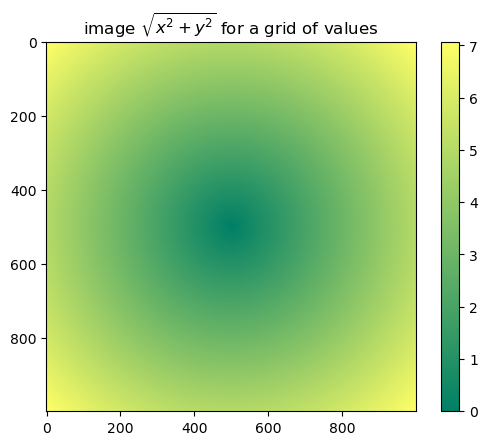

In [115]:
plt.imshow(z,cmap=plt.cm.summer)
plt.colorbar()
plt.title("image $\\sqrt{x^2+y^2}$ for a grid of values")
plt.show()